In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from keras import initializers
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import random
import keras.backend as K
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn import metrics

2024-05-05 19:56:23.480673: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-05 19:56:23.480835: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-05 19:56:23.646398: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

# **Reading the dataset**

In [3]:
df = pd.read_csv('/kaggle/input/mobile-device-price-dataset/train - train.csv')
df.head()

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0            842     0          2.2         0   1.0     0.0         7.0   
1           1021     1          0.5         1   0.0     1.0        53.0   
2            563     1          0.5         1   2.0     1.0        41.0   
3            615     1          2.5         0   0.0     0.0        10.0   
4           1821     1          1.2         0  13.0     1.0        44.0   

   m_dep  mobile_wt  n_cores  ...  px_height  px_width     ram  sc_h  sc_w  \
0    0.6      188.0      2.0  ...       20.0     756.0  2549.0   9.0   7.0   
1    0.7      136.0      3.0  ...      905.0    1988.0  2631.0  17.0   3.0   
2    0.9      145.0      5.0  ...     1263.0    1716.0  2603.0  11.0   2.0   
3    0.8      131.0      6.0  ...     1216.0    1786.0  2769.0  16.0   8.0   
4    0.6      141.0      2.0  ...     1208.0    1212.0  1411.0   8.0   2.0   

   talk_time  three_g  touch_screen  wifi  price_range  
0         19        0             0     1            1  
1          7        1             1     0            2  
2          9        1             1     0            2  
3         11        1             0     0            2  
4         15        1             1     0            1  

[5 rows x 21 columns]

# **Printing how many rows and columns**

In [4]:
df.shape

(2000, 21)

In [5]:
print("Attribute: ", df.shape[1] - 1)
print("Instances: ", df.shape[0])

Attribute:  20
Instances:  2000


# **Checking For Dtype strings to see if we will need label enncoding**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

# **Checking if any cloumn has null values because later on we will use standard scaler to normalize data, we need to deal with null values first**

In [7]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# **Null values are not too much, removing rows with null values will not affect our model training**

In [8]:
df = df.dropna()

# **Re-checking Null Values**

In [9]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# **Checking rows after removing rows with null values**

In [10]:
df.shape

(1991, 21)

In [11]:
print("Attribute: ", df.shape[1] - 1)
print("Instances: ", df.shape[0])

Attribute:  20
Instances:  1991


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1991 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1991 non-null   int64  
 1   blue           1991 non-null   int64  
 2   clock_speed    1991 non-null   float64
 3   dual_sim       1991 non-null   int64  
 4   fc             1991 non-null   float64
 5   four_g         1991 non-null   float64
 6   int_memory     1991 non-null   float64
 7   m_dep          1991 non-null   float64
 8   mobile_wt      1991 non-null   float64
 9   n_cores        1991 non-null   float64
 10  pc             1991 non-null   float64
 11  px_height      1991 non-null   float64
 12  px_width       1991 non-null   float64
 13  ram            1991 non-null   float64
 14  sc_h           1991 non-null   float64
 15  sc_w           1991 non-null   float64
 16  talk_time      1991 non-null   int64  
 17  three_g        1991 non-null   int64  
 18  touch_screen 

# **Checking some statistical analysis to learn about data**

In [13]:
df.iloc[:,:20].describe()

battery_power         blue  clock_speed     dual_sim           fc  \
count    1991.000000  1991.000000  1991.000000  1991.000000  1991.000000   
mean     1238.270718     0.496233     1.522451     0.510799     4.307885   
std       439.641057     0.500111     0.815499     0.500009     4.339735   
min       501.000000     0.000000     0.500000     0.000000     0.000000   
25%       851.500000     0.000000     0.700000     0.000000     1.000000   
50%      1225.000000     0.000000     1.500000     1.000000     3.000000   
75%      1615.500000     1.000000     2.200000     1.000000     7.000000   
max      1998.000000     1.000000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  1991.000000  1991.000000  1991.000000  1991.000000  1991.000000   
mean      0.520844    32.074335     0.502009   140.263184     4.516323   
std       0.499691    18.138177     0.288622    35.398777     2.291257   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   141.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  1991.000000  1991.000000  1991.000000  1991.000000  1991.000000   
mean      9.909091   644.800603  1251.115520  2123.632848    12.307885   
std       6.061019   442.951035   431.924893  1085.051293     4.213061   
min       0.000000     0.000000   500.000000   256.000000     5.000000   
25%       5.000000   282.500000   875.500000  1207.000000     9.000000   
50%      10.000000   564.000000  1247.000000  2147.000000    12.000000   
75%      15.000000   947.500000  1633.000000  3065.000000    16.000000   
max      20.000000  1960.000000  1998.000000  3998.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  
count  1991.000000  1991.000000  1991.000000   1991.000000  1991.000000  
mean      5.774485    11.001507     0.760924      0.501758     0.505274  
std       4.357385     5.464872     0.426626      0.500123     0.500098  
min       0.000000     2.000000     0.000000      0.000000     0.000000  
25%       2.000000     6.000000     1.000000      0.000000     0.000000  
50%       5.000000    11.000000     1.000000      1.000000     1.000000  
75%       9.000000    16.000000     1.000000      1.000000     1.000000  
max      18.000000    20.000000     1.000000      1.000000     1.000000

# **Creating a features object, feautures are our first 20 columns as the last coloumn is our target**

In [14]:
features = df.iloc[:, :20].columns

In [15]:
features

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

# **Creating a label list, -1: because we need onlu our last column**

In [16]:
labels =  df.iloc[:, -1:].columns.to_list()

In [17]:
labels

['price_range']

# **We need to check for outliers to decide the type of normalization, in case of too many outliers we use RobustScaler(), but the dataset doesn't have many outliers, so we will stick with standardScaler() later on**

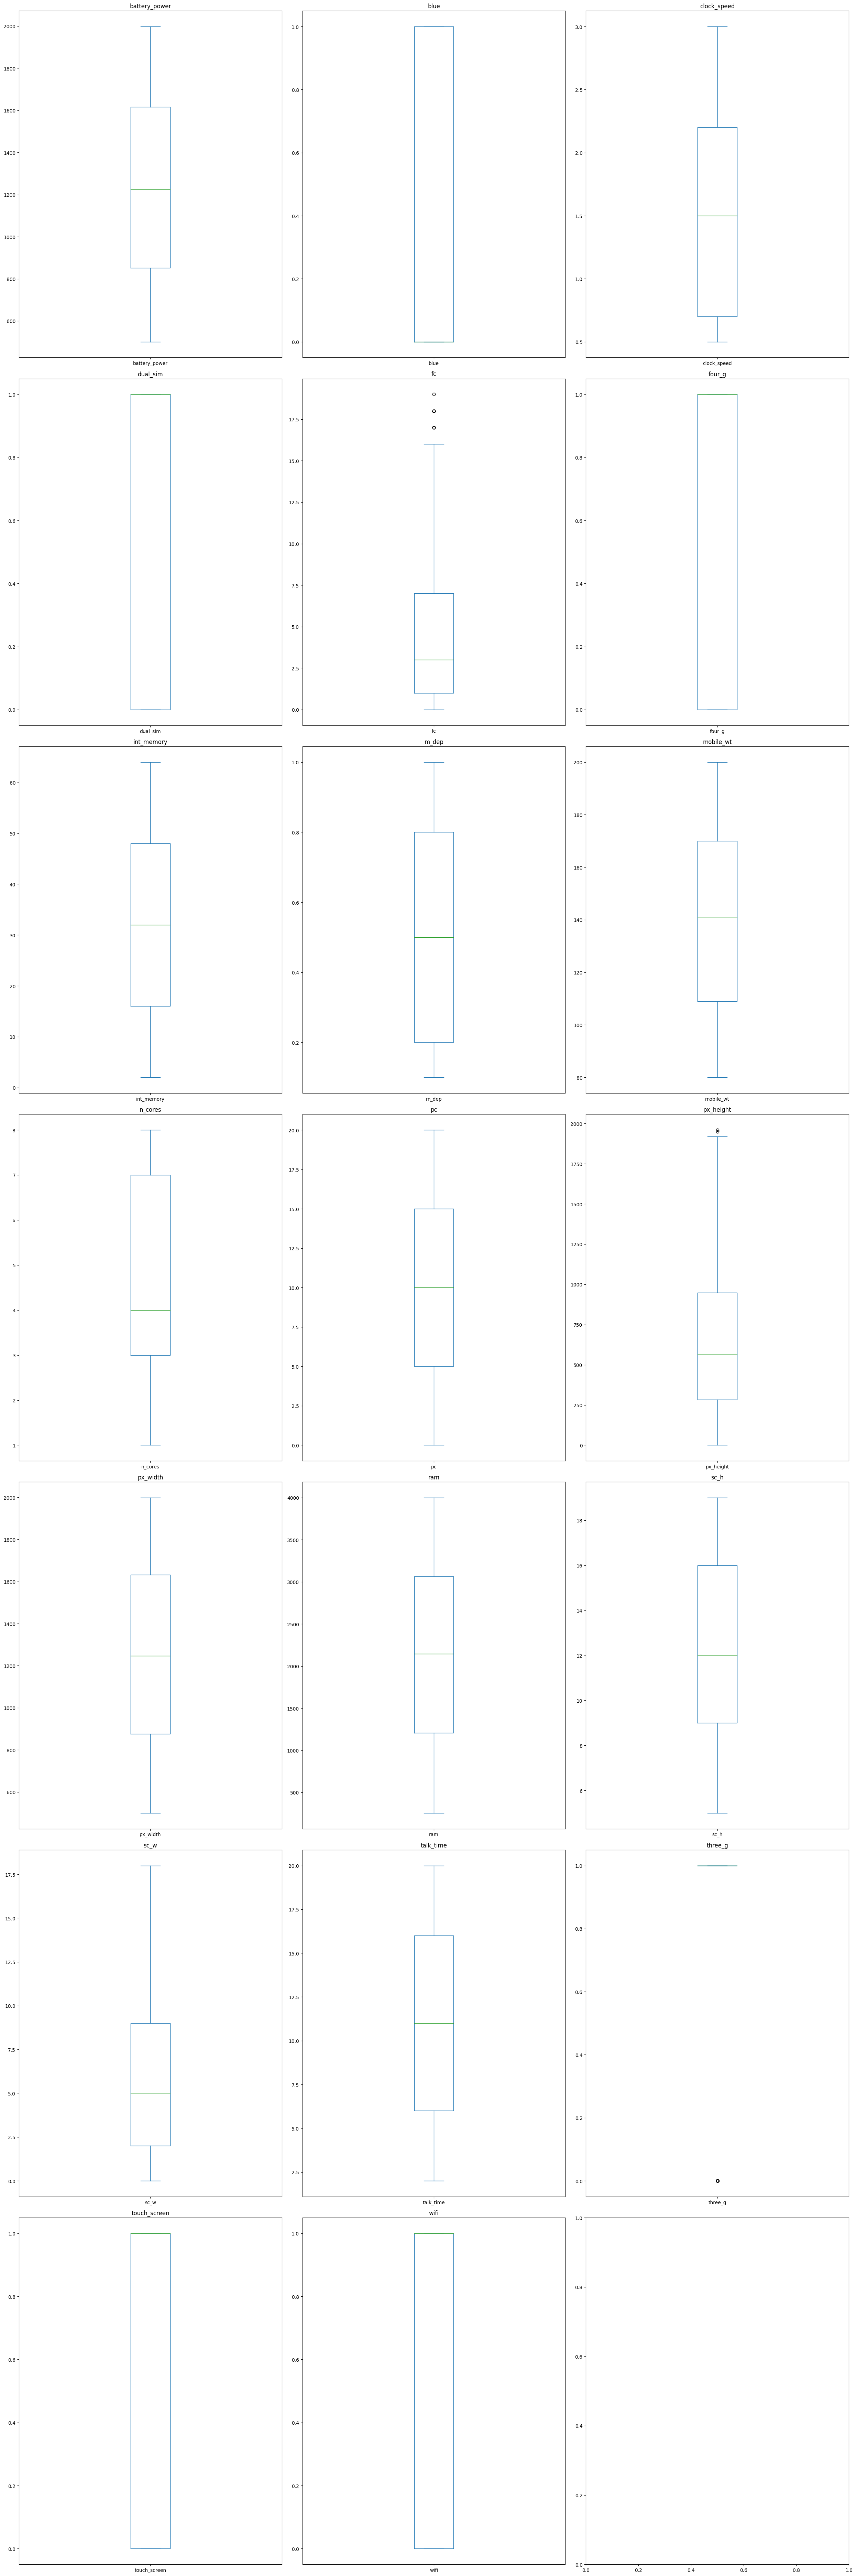

In [18]:
columns_to_plot = df.columns[:20]

fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(25, 75))
axes = axes.flatten()  

for i, column in enumerate(columns_to_plot):
    ax = axes[i]  
    df[column].plot(kind='box', ax=ax)
    ax.set_title(column)  
    ax.set_xlabel('') 
    
plt.tight_layout()
plt.show()

# **We need to check Data Distribution to learn more about central tendency, spread, skewness, and potential outliers for each feature.**

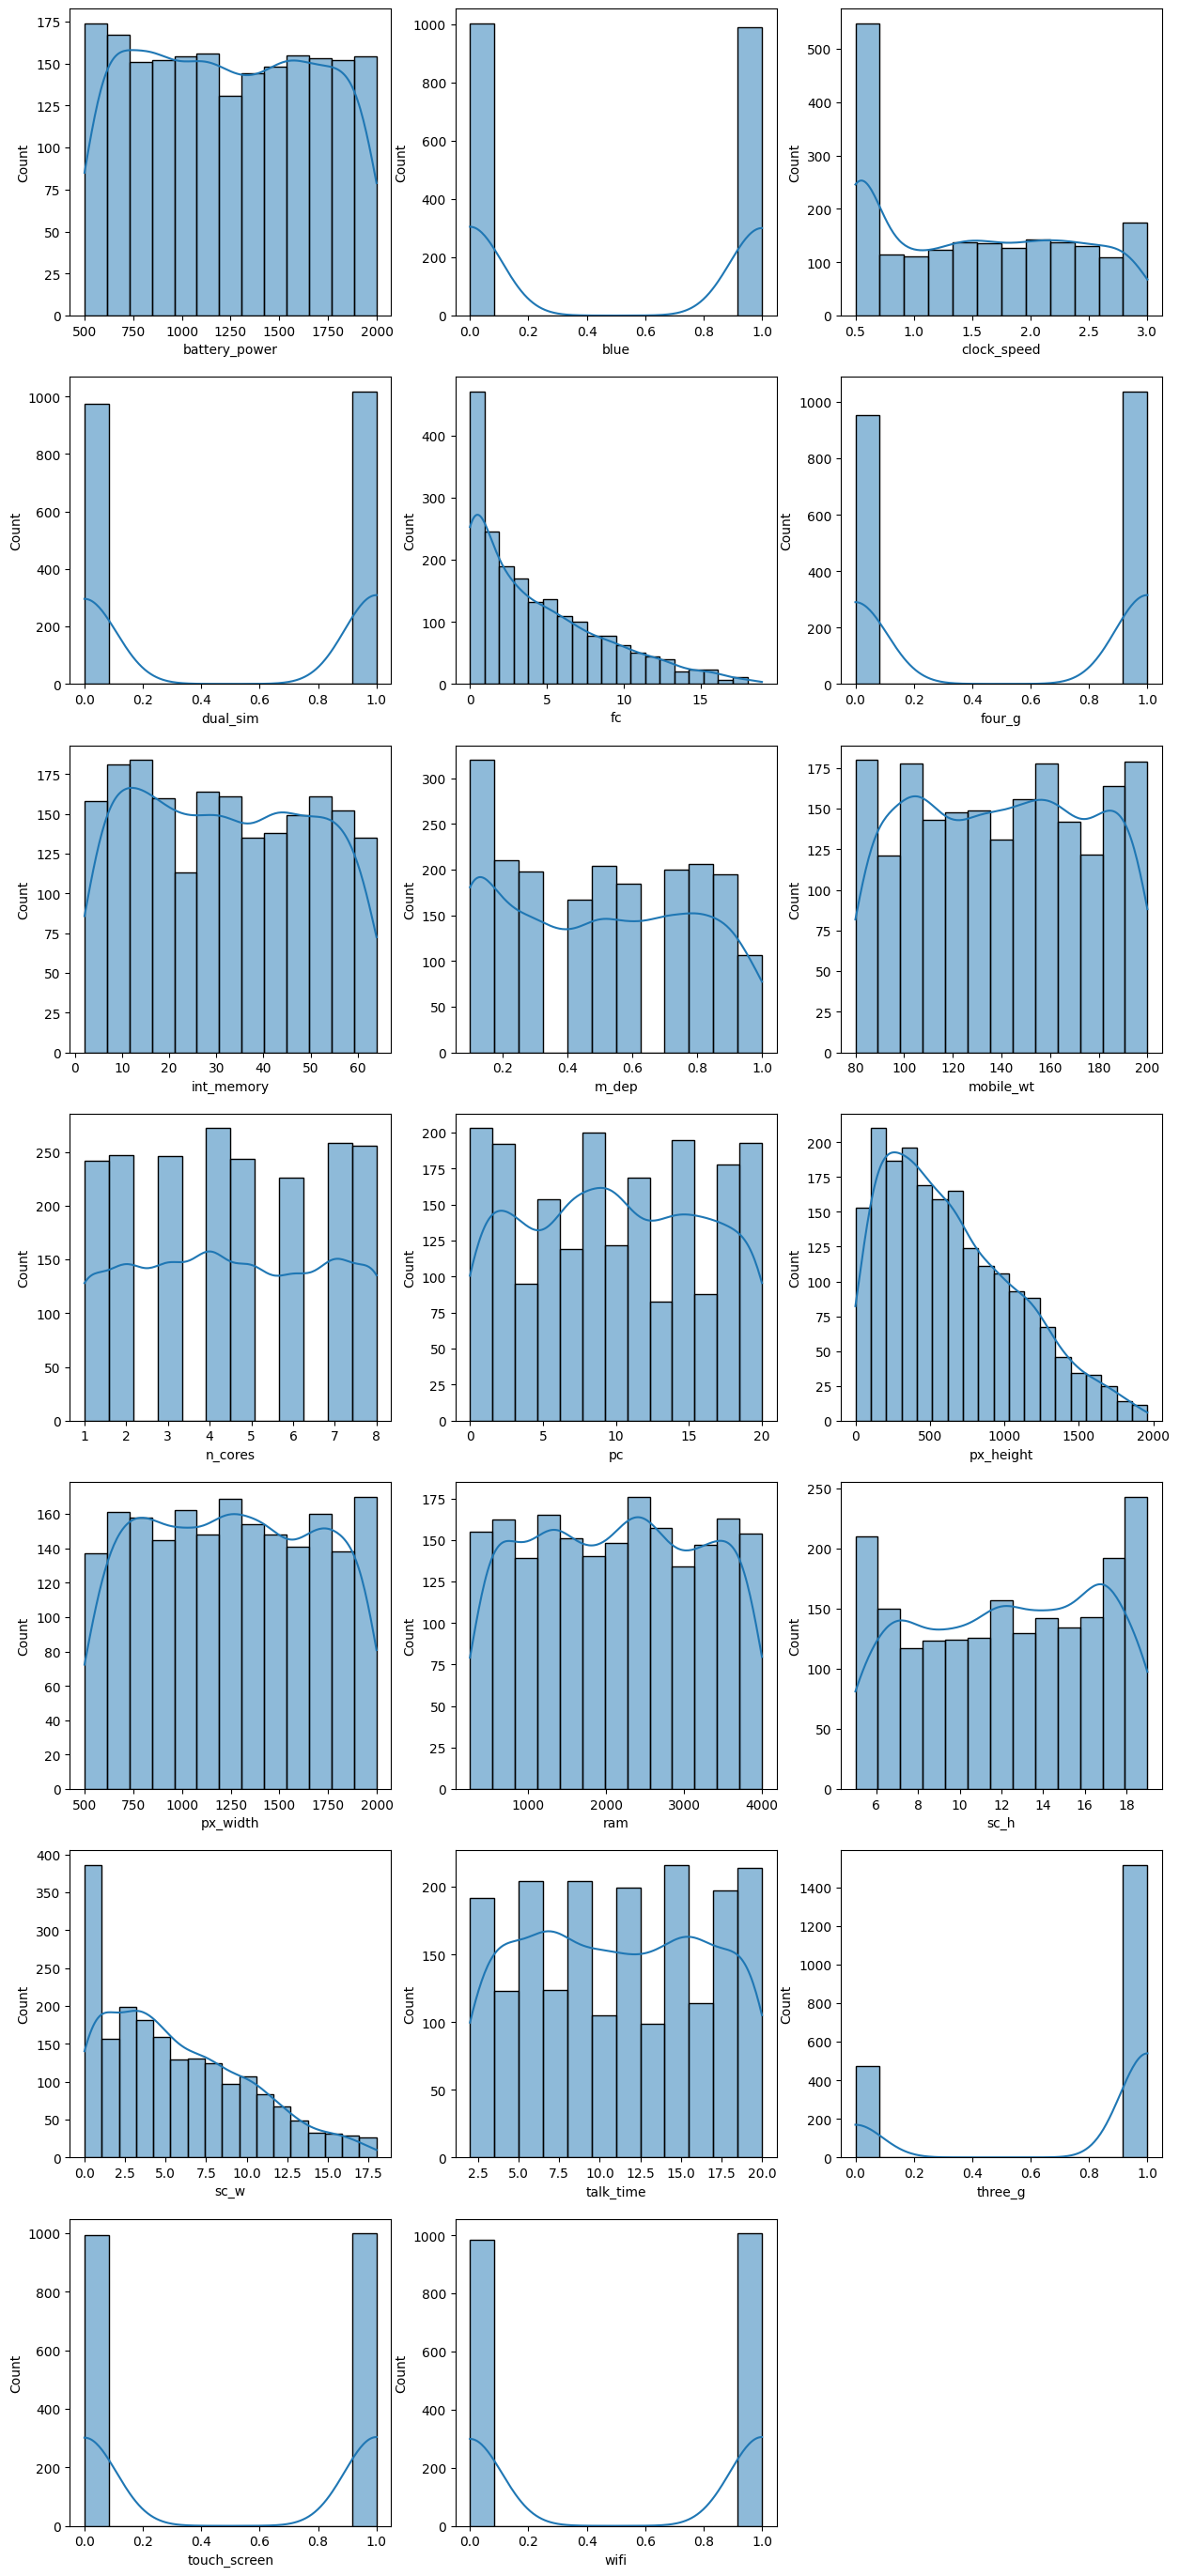

In [19]:
plt.figure(figsize=(15,45))
for i in range(20):
    plt.subplot(9,3,i+1)
    sns.histplot(data= df, x=features[i], kde=True )
#     plt.title(features_cols[i])
plt.show()

# **We need to learn more about Correlation between feautuers ( Feauture dependancy )**

# **1 means srong correlation in positive direction. ex: if feauture x increases, feauture y increases**

# **-1 means srong correlation in negative direction. ex: if feauture x increases, feauture y decreases**

In [20]:
def correlation_matrix(df_subset):
    fig = plt.figure(figsize=(20, 25))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)  
    sns.heatmap(df_subset.corr(), annot=True, cmap=cmap, vmin=-1, vmax=1)
    plt.title('Correlation Matrix of First 27 Columns\n', fontsize=15)
    plt.xticks(fontsize=9, rotation=45)
    plt.yticks(fontsize=9)
    plt.show()

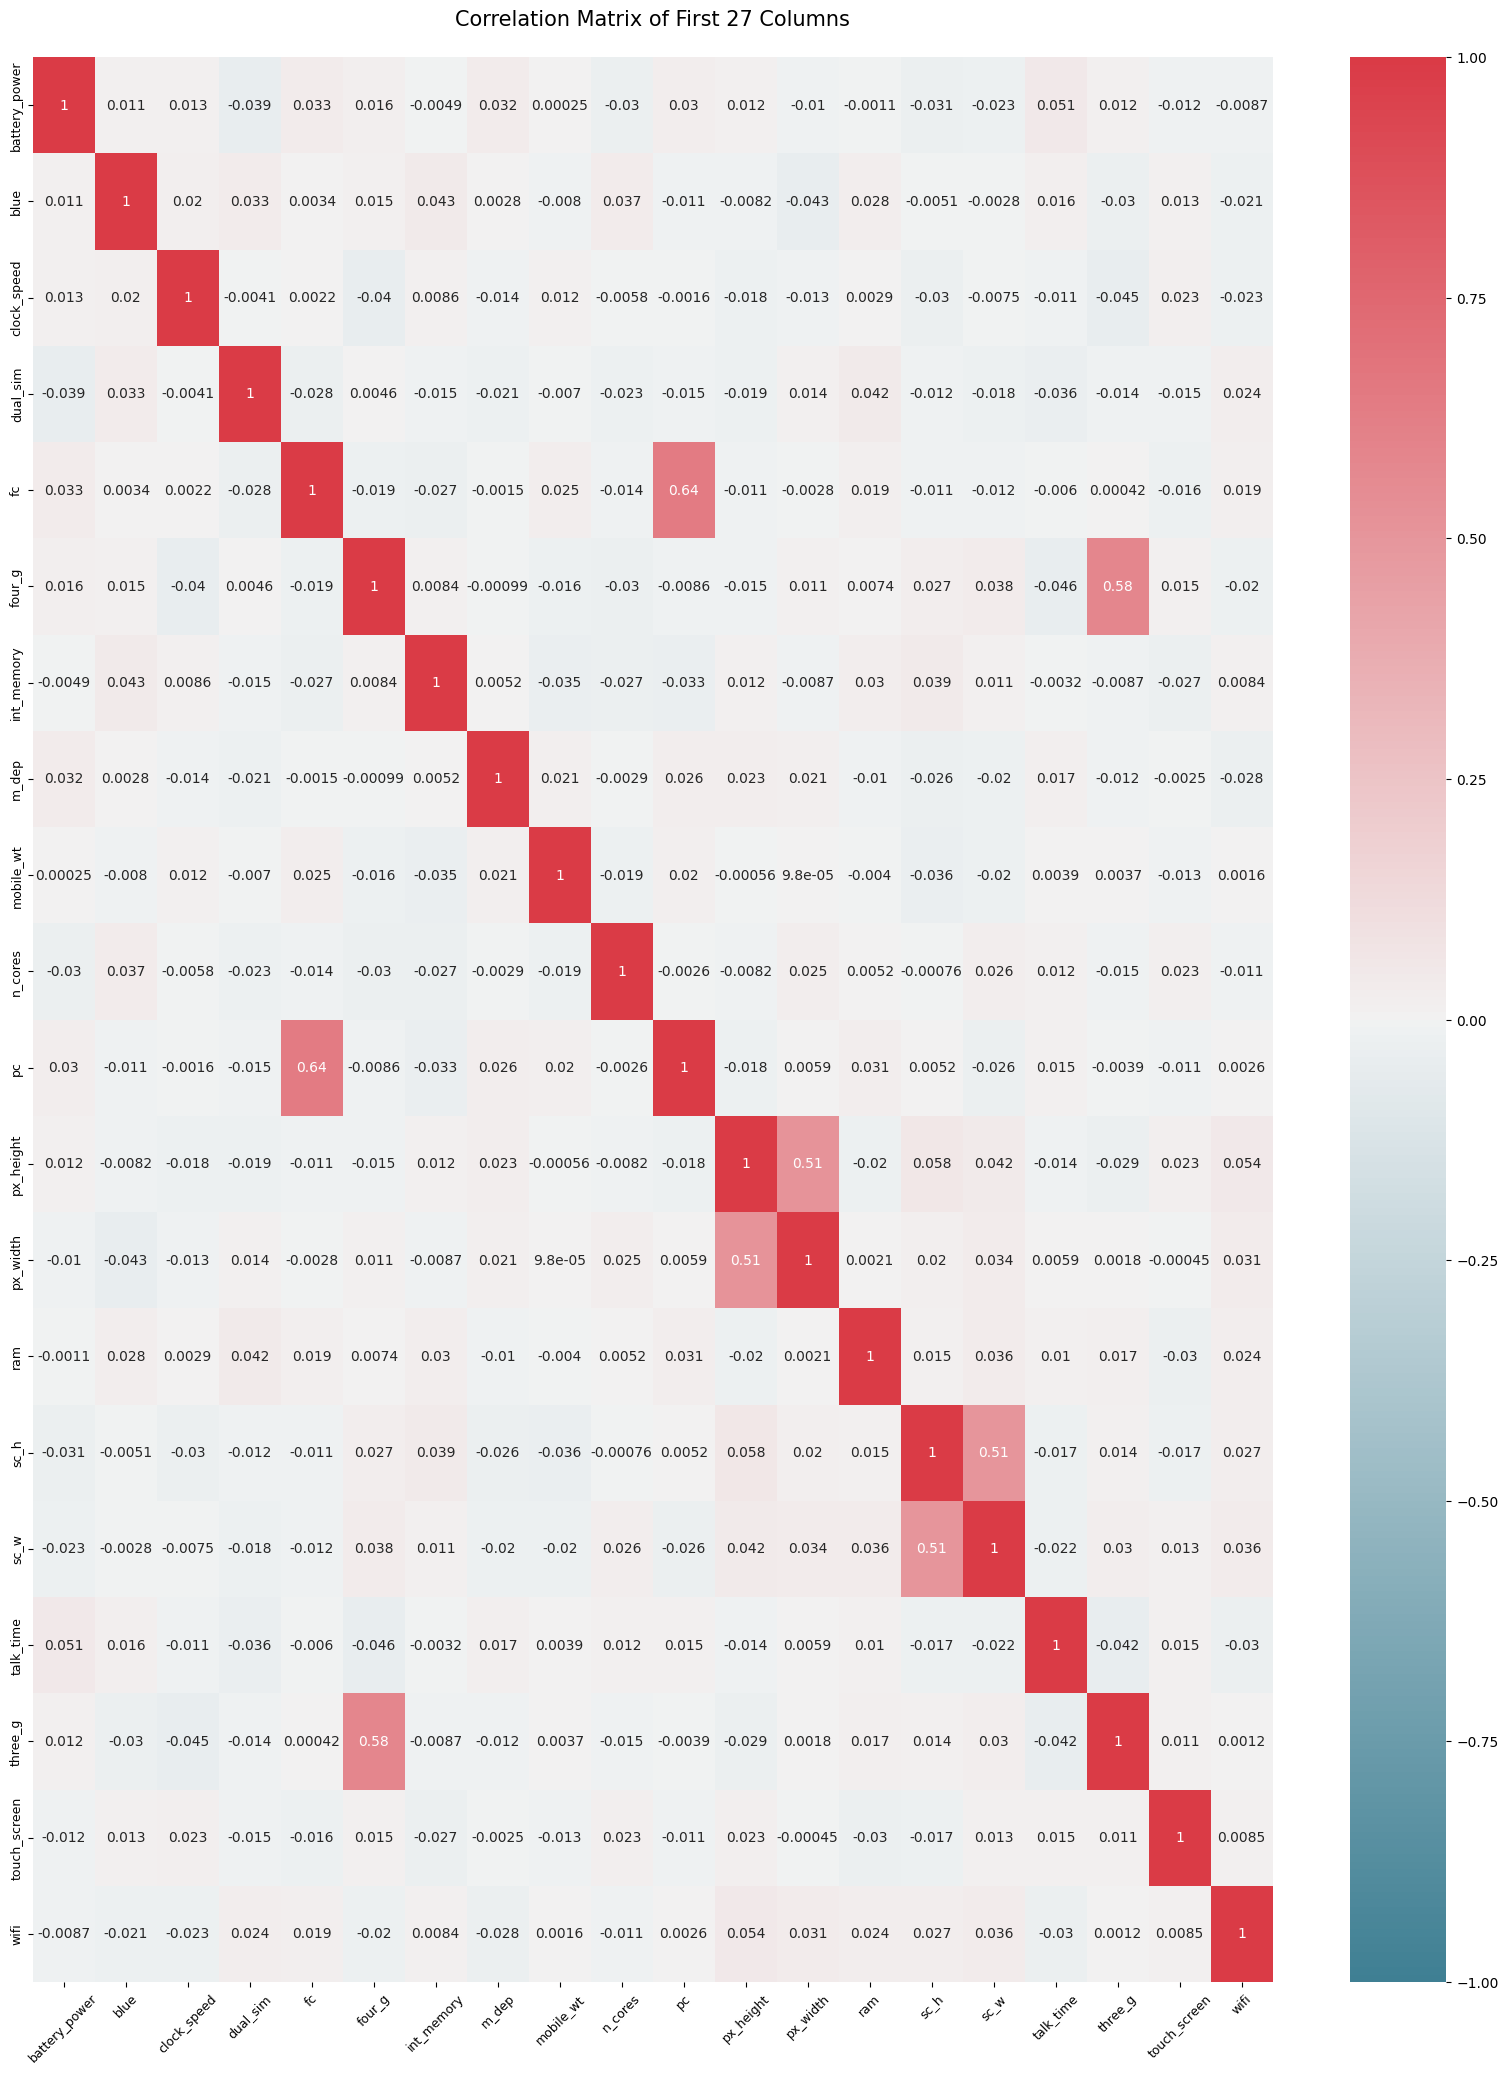

In [21]:
columns_to_analyze = df.columns[:20]  
df_subset = df[columns_to_analyze]

correlation_matrix(df_subset)

# **now we will assign our features to x, and our label to y**

In [49]:
X = df[features]
y = df[labels]

In [50]:
x

battery_power  blue  clock_speed  dual_sim    fc  four_g  int_memory  \
0               842     0          2.2         0   1.0     0.0         7.0   
1              1021     1          0.5         1   0.0     1.0        53.0   
2               563     1          0.5         1   2.0     1.0        41.0   
3               615     1          2.5         0   0.0     0.0        10.0   
4              1821     1          1.2         0  13.0     1.0        44.0   
...             ...   ...          ...       ...   ...     ...         ...   
1995            794     1          0.5         1   0.0     1.0         2.0   
1996           1965     1          2.6         1   0.0     0.0        39.0   
1997           1911     0          0.9         1   1.0     1.0        36.0   
1998           1512     0          0.9         0   4.0     1.0        46.0   
1999            510     1          2.0         1   5.0     1.0        45.0   

      m_dep  mobile_wt  n_cores    pc  px_height  px_width     ram  sc_h  \
0       0.6      188.0      2.0   2.0       20.0     756.0  2549.0   9.0   
1       0.7      136.0      3.0   6.0      905.0    1988.0  2631.0  17.0   
2       0.9      145.0      5.0   6.0     1263.0    1716.0  2603.0  11.0   
3       0.8      131.0      6.0   9.0     1216.0    1786.0  2769.0  16.0   
4       0.6      141.0      2.0  14.0     1208.0    1212.0  1411.0   8.0   
...     ...        ...      ...   ...        ...       ...     ...   ...   
1995    0.8      106.0      6.0  14.0     1222.0    1890.0   668.0  13.0   
1996    0.2      187.0      4.0   3.0      915.0    1965.0  2032.0  11.0   
1997    0.7      108.0      8.0   3.0      868.0    1632.0  3057.0   9.0   
1998    0.1      145.0      5.0   5.0      336.0     670.0   869.0  18.0   
1999    0.9      168.0      6.0  16.0      483.0     754.0  3919.0  19.0   

      sc_w  talk_time  three_g  touch_screen  wifi  
0      7.0         19        0             0     1  
1      3.0          7        1             1     0  
2      2.0          9        1             1     0  
3      8.0         11        1             0     0  
4      2.0         15        1             1     0  
...    ...        ...      ...           ...   ...  
1995   4.0         19        1             1     0  
1996  10.0         16        1             1     1  
1997   1.0          5        1             1     0  
1998  10.0         19        1             1     1  
1999   4.0          2        1             1     1  

[1991 rows x 20 columns]

In [51]:
y

price_range
0               1
1               2
2               2
3               2
4               1
...           ...
1995            0
1996            2
1997            3
1998            0
1999            3

[1991 rows x 1 columns]

# **I will use Decison tree as my ML algorithm, in practice, Decision Trees are versatile in handling different scales and distributions of features, so the choice of scaler may have minimal to zero impact on the performance compared to other machine learning algorithms, so i wont scale my features.**

# **I will split the data by 25% validation and 75% train**

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=3)

# **Printing rows and columns of the feautures and label model will be trained on**

# **Printing rows and columns of the feautures and label model will use to validate**

# **The model will be trained on 1493 rows**

# **The model will use 498 rows to validate**

In [55]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1493, 20)
(498, 20)
(1493, 1)
(498, 1)


# **Importing Decison Tree Classifier**

# **Why did i use Decision Tree?**
# **If the output was contionious value like the exact price i would have used linear algorithm**
# **If the goal was grouping devices with the same or close price i would have used K-means clsutering**
# **However, the dataset was labeled as 0 (low cost) 1 (medium cost) 2 (high cost) 3 (very high cost), which means we need a classification algorithm**

In [56]:
from sklearn import tree

# **random state of 40 means each time i will train the model it will start from same place in dataset**

# **Helpful when i want to test the ML model with different hyperparameters**

In [57]:
clf_dt = tree.DecisionTreeClassifier(random_state=40)

In [58]:
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=40)

In [59]:
clf_dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 40,
 'splitter': 'best'}

In [60]:
y_train_pred = clf_dt.predict(X_train)

In [61]:
y_test_pred = clf_dt.predict(X_test)

In [62]:
train_acc = metrics.accuracy_score(y_train, y_train_pred)
test_acc = metrics.accuracy_score(y_test, y_test_pred)
precision = metrics.precision_score(y_test, y_test_pred, average='weighted')
recall = metrics.recall_score(y_test, y_test_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_test_pred, average='weighted')

# **Validation Accuracy of 82%**
# **F1-Score of 82%, F1-score is the harmonic mean of precision and recall. It provides a balanced measure that considers both false positives and false negatives.**

In [63]:
print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Training Accuracy: 1.0
Testing Accuracy: 0.8253012048192772
Precision: 0.8309246559653225
Recall: 0.8253012048192772
F1-Score: 0.8270656514885045


# **99 in class 0 where correctly predicted**
# **114 in class 1 where correctly predicted**
# **95 in class 2 where correctly predicted**
# **102 in class 3 where correctly predicted**

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 99  15   0   0]
 [  8 114  22   0]
 [  0  10  96  14]
 [  0   0  18 102]]


# **Later on, we will prune the tree, we reached probabilty of 1 becuse tree grew to its pure node (maximum depth)**

In [65]:
clf_dt.predict_proba(X_test[1:10])

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

# **As we see the tree reached training accuracy of 1 because the we reached pure nodes, which means model is overfitted**

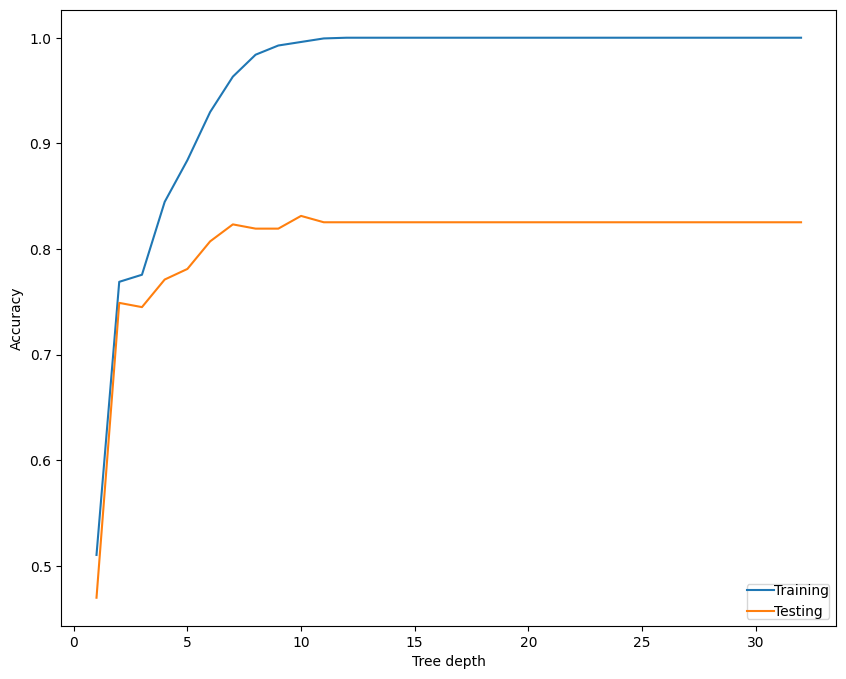

In [66]:
max_depth = np.linspace(1,32,32,dtype='int32')
accuracy_train,accuracy_test=[],[]

for i in max_depth:
    clf_dt=tree.DecisionTreeClassifier(max_depth=i, random_state=40)
    clf_dt.fit(X_train,y_train)
    y_train_pred = clf_dt.predict(X_train)
    y_test_pred = clf_dt.predict(X_test)

    accuracy_train.append(metrics.accuracy_score(y_train, y_train_pred))
    accuracy_test.append(metrics.accuracy_score(y_test, y_test_pred))

ax= plt.figure(figsize=(10, 8))
plt.plot(max_depth,accuracy_train)
plt.plot(max_depth,accuracy_test)
plt.ylabel('Accuracy')
plt.xlabel('Tree depth')
plt.legend(['Training', 'Testing'],loc='lower right', borderpad=0, handletextpad=0)
plt.show()

# **Splitting all cases caused the overfitting, so we need to tune the decision tree**

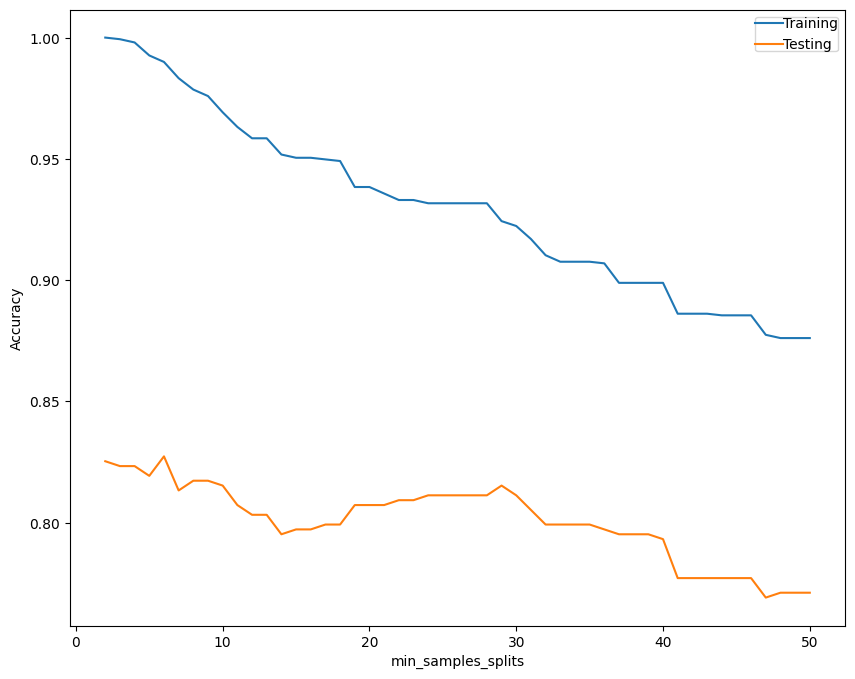

In [67]:
min_samples_split = np.linspace(2, 50, 50,dtype='int32')
accuracy_train,accuracy_test=[],[]

for i in min_samples_split:
    clf_dt=tree.DecisionTreeClassifier(min_samples_split=i, random_state=40)
    clf_dt.fit(X_train,y_train)
    y_train_pred = clf_dt.predict(X_train)
    y_test_pred = clf_dt.predict(X_test)

    accuracy_train.append(metrics.accuracy_score(y_train, y_train_pred))
    accuracy_test.append(metrics.accuracy_score(y_test, y_test_pred))

ax= plt.figure(figsize=(10, 8))
plt.plot(min_samples_split,accuracy_train)
plt.plot(min_samples_split,accuracy_test)
plt.ylabel('Accuracy')
plt.xlabel('min_samples_splits')
plt.legend(['Training', 'Testing'],loc='upper right', borderpad=0, handletextpad=0)
plt.show()

# **Now we will assign the same random state, but we will assign to arguments that will perevent overfitting**

# **max depth and min_samples_split** 

# **This will avoid tree reaching its pure nodes**

In [68]:
Tuned_tree = tree.DecisionTreeClassifier(random_state=40,max_depth=7, min_samples_split=42)
Tuned_tree.fit(X_train,y_train)
y_train_pred_tuned = Tuned_tree.predict(X_train)
y_test_pred_tuned = Tuned_tree.predict(X_test)

In [69]:
train_acc_tuned = metrics.accuracy_score(y_train, y_train_pred_tuned)
test_acc_tuned = metrics.accuracy_score(y_test, y_test_pred_tuned)
precision_tuned = metrics.precision_score(y_test, y_test_pred_tuned, average='weighted')
recall_tuned = metrics.recall_score(y_test, y_test_pred_tuned, average='weighted')
f1_score_tuned = metrics.f1_score(y_test, y_test_pred_tuned, average='weighted')

# **Now the validation accuracy is 78%, which is worse than before**
# **Surprisngly, this metrics are much better than un-pruned tree**
# **How?**
# **Because the difference between the training accuracy and validation accuracy is much lower than un-pruned tree, this results in a better loss**
# **Consequently, other metrics are lower than un-pruned tree, yet they are much better**

In [70]:
print("Tuned Model Metrics:")
print("Training Accuracy:", train_acc_tuned)
print("Testing Accuracy:", test_acc_tuned)
print("Precision:", precision_tuned)
print("Recall:", recall_tuned)
print("F1-Score:", f1_score_tuned)

Tuned Model Metrics:
Training Accuracy: 0.8861352980576022
Testing Accuracy: 0.7771084337349398
Precision: 0.776287006760892
Recall: 0.7771084337349398
F1-Score: 0.7762924721333068


# **100 in class 0 where correctly predicted**
# **110 in class 1 where correctly predicted**
# **73 in class 2 where correctly predicted**
# **104 in class 3 where correctly predicted**

In [71]:
conf_matrix_tuned = confusion_matrix(y_test, y_test_pred_tuned)
print("Confusion Matrix:")
print(conf_matrix_tuned)

Confusion Matrix:
[[100  14   0   0]
 [ 11 110  23   0]
 [  0  28  73  19]
 [  0   0  16 104]]


# **A diagram of the tuned tree**

<Figure size 640x480 with 0 Axes>

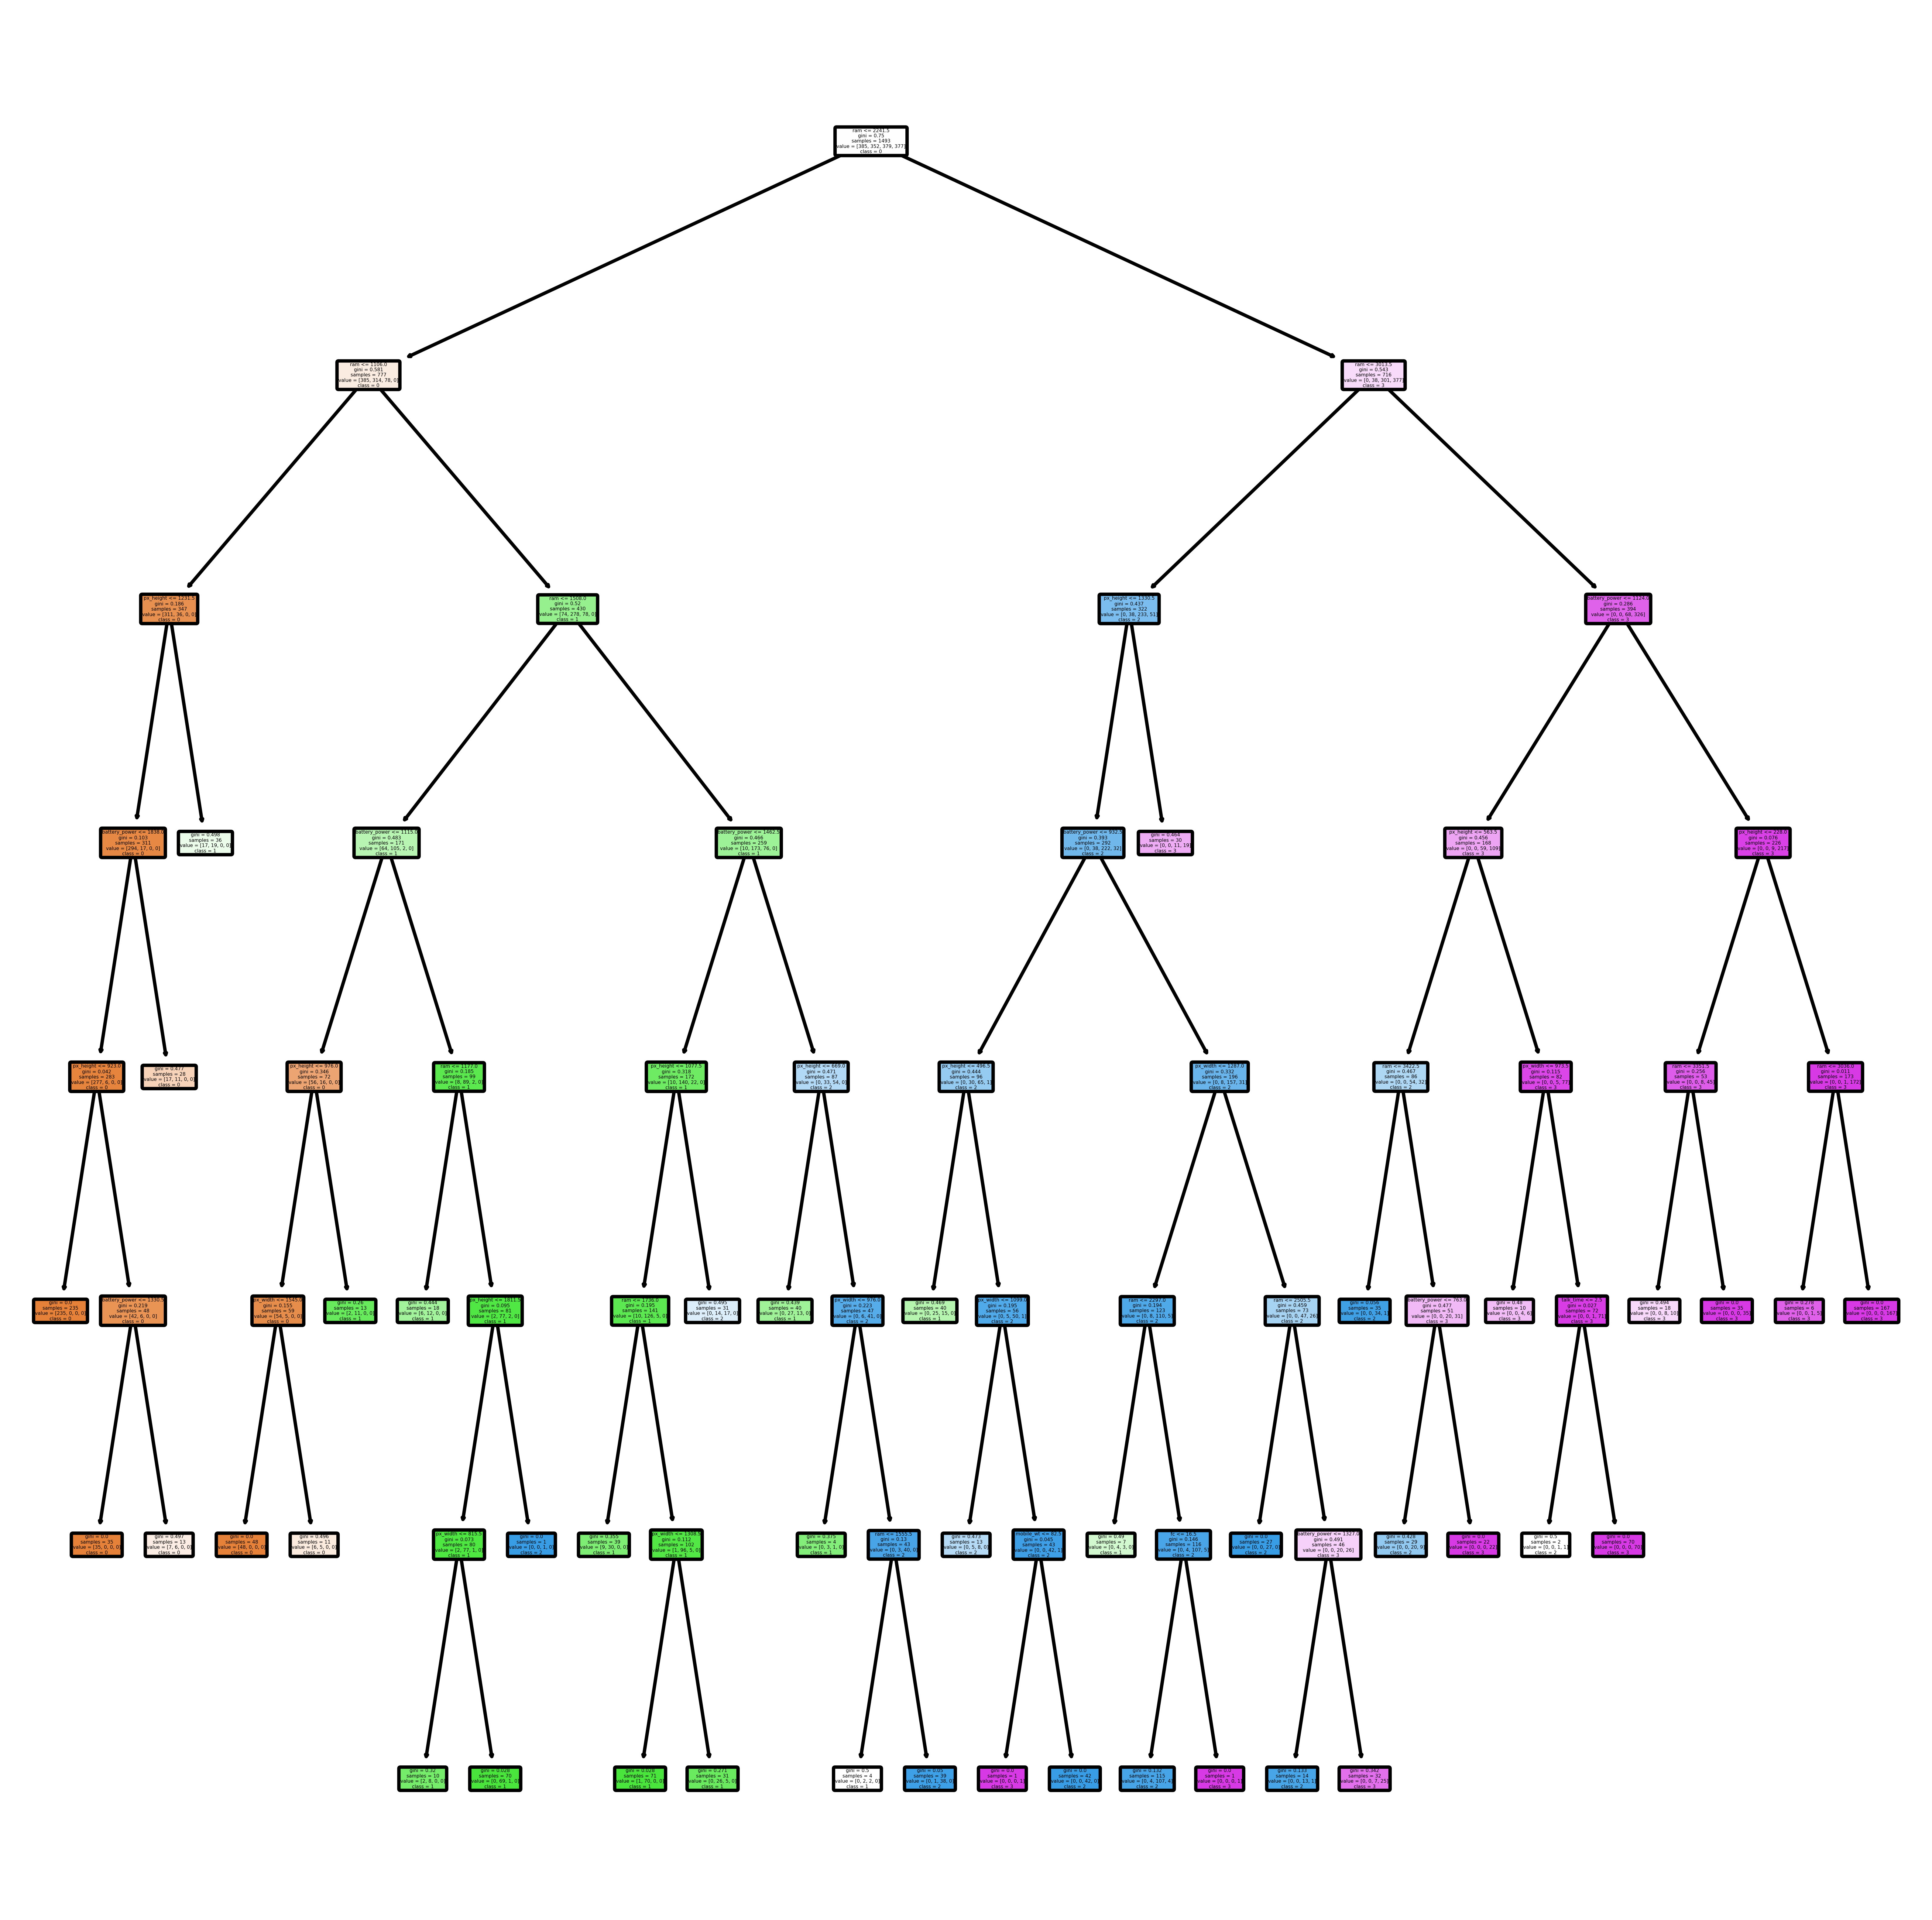

In [72]:
plt.figure()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=800)
tree.plot_tree(Tuned_tree, feature_names = x.columns.tolist(),
               class_names=['0','1' , '2' , '3'],
               filled = True,
              rounded=True)
plt.show()

# **A diagram of un-pruned tree, reaching its pure nodes**

<Figure size 640x480 with 0 Axes>

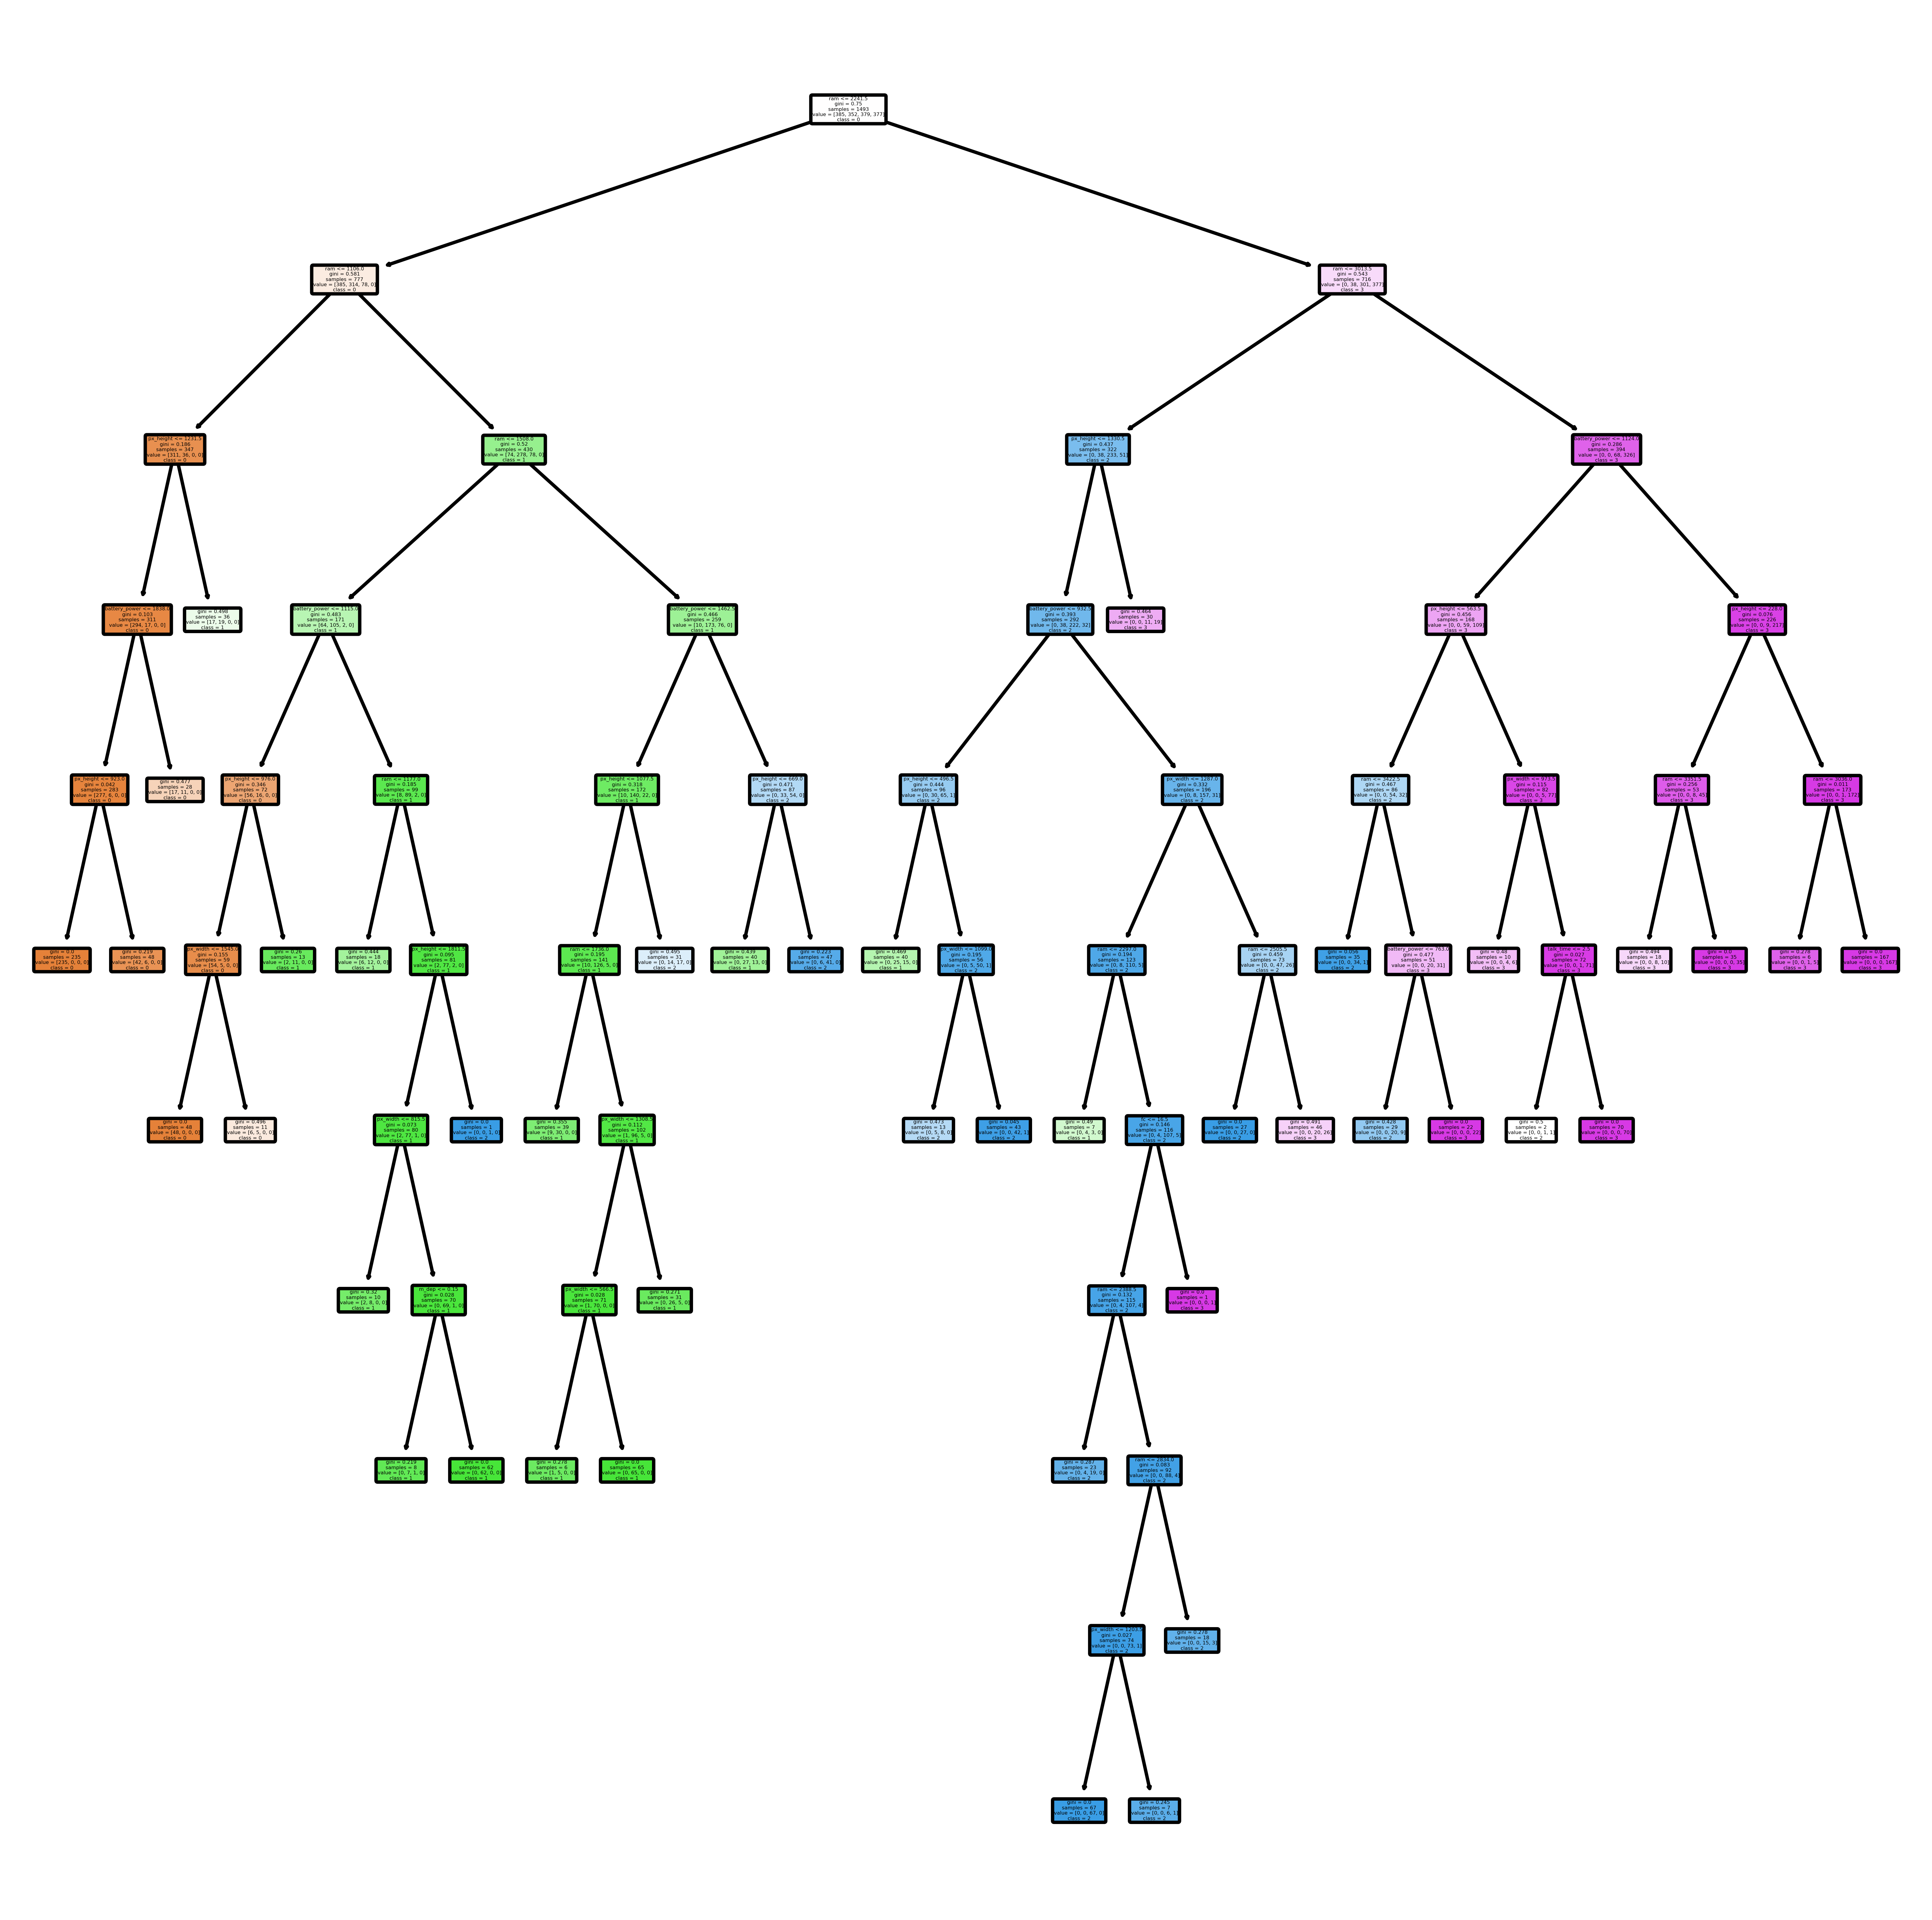

In [73]:
plt.figure()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=800)
tree.plot_tree(clf_dt, feature_names = x.columns.tolist(),
               class_names=['0','1' , '2' , '3'],
               filled = True,
              rounded=True)
plt.show()

# **Prediction Class Label on first 10 rows of test data**

In [74]:
import pandas as pd

X_test = pd.read_csv('/kaggle/input/mobile-device-price-dataset/test - test.csv')

X_test = X_test.drop('id', axis=1) 

X_test_subset = X_test.iloc[:10]

predictions = Tuned_tree.predict(X_test_subset)

print("Predicted class labels for the first 10 rows:")
print(predictions)


Predicted class labels for the first 10 rows:
[3 3 2 3 1 3 3 1 3 0 3 3 0 0 2 0 1 1 3 2 0 2 2 2 3 0 2 0 3 0 2 0 3 0 0 1 3
 1 3 1 1 2 0 0 0 1 0 3 1 2 1 0 3 0 3 1 3 1 1 3 3 2 0 1 1 1 1 2 1 2 1 2 2 3
 3 0 2 0 2 3 1 3 3 0 3 0 3 1 3 0 1 1 2 1 2 1 0 2 1 2 1 0 0 3 1 2 1 1 2 3 2
 2 1 3 3 3 3 1 3 0 0 3 2 1 1 1 3 2 3 2 0 2 2 1 3 0 1 0 3 2 1 3 1 3 2 3 3 2
 2 3 2 3 0 0 3 2 3 3 3 3 3 2 3 3 3 3 1 0 3 0 0 0 2 1 0 1 1 0 1 2 0 0 0 1 1
 3 2 2 0 0 0 0 0 3 1 1 2 2 2 3 1 1 3 3 3 2 1 0 0 0 1 2 0 3 3 3 0 2 0 3 1 2
 3 0 0 1 0 3 0 1 0 2 2 1 3 0 3 0 3 1 2 0 0 2 1 2 3 3 2 1 3 0 0 3 3 2 1 3 1
 0 3 2 1 2 3 3 3 1 1 1 1 3 2 1 3 2 0 3 0 1 2 0 0 3 2 3 2 2 1 3 3 2 3 1 2 1
 2 0 2 3 1 0 0 3 0 3 0 1 2 0 2 3 1 3 2 2 0 2 0 0 0 1 3 2 0 0 0 3 1 0 3 3 0
 2 2 2 3 1 3 3 2 2 3 3 3 0 3 1 3 1 3 1 2 3 0 1 1 3 1 3 1 3 1 0 0 0 2 0 0 2
 1 1 2 3 1 0 1 0 0 3 2 0 3 1 2 2 1 2 3 1 1 3 2 1 2 0 1 1 0 3 2 1 0 2 0 0 1
 0 0 0 1 2 2 3 1 3 0 2 1 3 0 1 1 1 2 1 3 2 3 3 1 3 1 3 1 3 2 1 1 2 2 1 0 0
 0 1 2 1 1 3 2 1 2 3 0 0 3 1 1 1 3 3 3 0 3 0 1 3 3 3 0

# **Downloading model as .pkl file to be used in backend**

In [48]:
import joblib

tuned_model_filename = '/kaggle/working/tuned_decision_tree_model.pkl'

joblib.dump(Tuned_tree, tuned_model_filename)

print(f"Tuned Model saved as {tuned_model_filename}")

Tuned Model saved as /kaggle/working/tuned_decision_tree_model.pkl
